<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">Contents:
  
* Ways of detecting missing values
* Standard and non-standard missing values
* Basic imputation methods for replacing missing values
* Identifying and removing Duplicates from your data
* Outlier detection - visually
* Outlier detection - by Z-scores
* Replacing outliers by median
* Outlier detection - by IQR
* Replacing outliers by whiskers
* Remove or modify incorrect or unwanted observations
    

# Dealing with Missing Values
Here we will discuss how to find and deal with missing values in a datast.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Importing the library:

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Reading the data:

In [10]:
#The dataset has information about some cities and states.

In [11]:
Data = pd.read_csv('data.csv')  # read the data
Data.head()

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


* Observe the data and see if you can recognise missing values or 'garbage' values in the data
* Data type of missing values don't necessarily have to be np.nan
* Based on the context we often decide what should be a missing value and what qualifies as valid data

# Dealing with Duplicates in your data

In [12]:
##Identify duplicates records in the data
dupes = Data.duplicated()
sum(dupes)
dupes

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16     True
17     True
18     True
19    False
20    False
21    False
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
dtype: bool

In [13]:
##here we can see that there are 13 duplicated rows. We want to remove the duplicate rows.
#Removing Duplicates
Data =Data.drop_duplicates()

In [14]:
#Now check the duplicate data again and you will see that there are no duplicate rows.
dupes = Data.duplicated()
sum(dupes)

0

# Dealing with Missing Values in your data

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Standard Missing Values
![alt text](missing1.png "Skewed vs normal distribution")


Going back to our original dataset, let’s take a look at the “Number” column.

In [15]:
# What isnull() function recognises as missing value

pd.DataFrame({'value' : Data['Number'], 'Missing?' : Data['Number'].isnull()}) 

,value,Missing?
0,123456.0,False
1,54321.0,False
2,87654.0,False
3,3456.0,False
4,7654.0,False
5,NaN,True
6,87654.0,False
7,6789.0,False
8,NaN,True
9,4567.0,False


* 'NaN' is recognised as missing value

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Non-Standard Missing Values
<br>
![alt text](missing2.png "Skewed vs normal distribution")    


In [16]:
# what isnull() does not recognise as missing value

pd.DataFrame({'value' : Data['Shape Reported'], 'Missing value?' : Data['Shape Reported'].isnull()})

,value,Missing value?
0,TRIANGLE,False
1,NaN,True
2,OVAL,False
3,DISK,False
4,LIGHT,False
5,NaN,True
6,CIRCLE,False
7,DISK,False
8,12,False
9,CYLINDER,False


* Only 'NaN' is recognised as missing value
* Depending on the context, we decide what should be a missing value

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Unexpected Missing Values

In [17]:
pd.DataFrame({'value': Data['State'], 'Missing?': Data['State'].isnull()})

,value,Missing?
0,NY,False
1,NJ,False
2,CO,False
3,KS,False
4,NY,False
5,N,False
6,CA,False
7,MI,False
8,AK,False
9,NaN,True


* Because all the fields are names of states, 5th element and 12th element can be considered as garbage values

In [18]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
Number,3
City,0
Colors Reported,9
Shape Reported,2
State,1
Time,0


### Any missing values?

In [19]:
Data.isnull().values.any()   # Any of the values in the dataframe is a missing value

True

### Total number of missing values

In [20]:
Data.isnull().sum().sum()  # Total number of recognised missing values in the entire dataframe

15

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Replacing Missing Values
    

There are many values in which missing values can be replaced by different values which is often called
as imputing missing values. It depends on your data and the problem you are trying to solve. In the below cell different types of missing value imputations are shown.

In [21]:
# Replacing NaN with a custom value
Data['Number'].fillna(12345, inplace = True)   

# Replace NaN values with the mean of the column
# Data['Number'].fillna(Data.Number.mean(), inplace = True)  

# Replace NaN values with the median of the column
# Data['Number'].fillna(Data.Number.median(), inplace = True)  

Data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,87654.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


### Location based replacement

In [22]:
Data.loc[2,'Number'] = 1234  # replace a value at a specific location
Data

,Number,City,Colors Reported,Shape Reported,State,Time
0,123456.0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,54321.0,Willingboro,green,NaN,NJ,6/30/1930 20:00
2,1234.0,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
4,7654.0,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,12345.0,Valley City,NaN,NaN,N,9/15/1934 15:30
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
7,6789.0,Alma,NaN,DISK,MI,7/15/1936 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
9,4567.0,Hubbard,red,CYLINDER,NaN,6/15/1937 0:00


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">   Droping Rows with Missing Values

In [23]:
Data.dropna(inplace=True)  # Drops all the rows that have atleast one missing values
Data.isnull().sum()


Number             0
City               0
Colors Reported    0
Shape Reported     0
State              0
Time               0
dtype: int64

In [24]:
Data

,Number,City,Colors Reported,Shape Reported,State,Time
3,3456.0,Abilene,blue,DISK,KS,1/12/1900 0:00
6,87654.0,Crater Lake,yellow,CIRCLE,CA,6/15/1935 0:00
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


* Getting rid of rows with missing values is the easiest way of dealing with their presence
* But the downside is that we lose valid data from other columns which do not have missing values for that particular row

# Dealing with incorrect or unwanted observations

In [25]:
Data.tail()

,Number,City,Colors Reported,Shape Reported,State,Time
8,12345.0,Eklutna,green,12,AK,10/15/1936 17:00
12,6543.0,Belton,red,SPHERE,Y,6/30/1939 20:00
19,6543.0,Belton,red,???,Y,6/30/1939 20:00
20,876.0,Keokuk,not known,@,IA,7/7/1939 2:00
21,5432.0,Ludington,*****,DISK,MI,6/1/1941 13:00


Here you can see some incorrect and currupted values like **** and @ in your data.
You need to look for such values manually sometime and you can also use summary stats or plots to find such values.

# These values can be modified based on the problem you are trying to solve and what is required for your case.
Here we can say that **** value can be replaced by null or most common color value and @ is also like a null value which can be imputed based on the methods shown above.


In [26]:
## Try modifying these incorrect values based on your case.

# Dealing with Outliers 
In the part given below we will discuss outliers in a dataset.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  About DataSet :
    
**We will be using Boston House Pricing Dataset which is included in the sklearn dataset API. We will load the dataset and separate out the features and targets.**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Importing the library:

In [27]:
from sklearn.datasets import load_boston

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Loading the data

In [28]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

In [29]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Discover outliers with visualization tools

### Box plot-

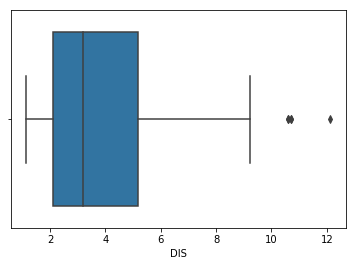

In [30]:
import seaborn as sns     # library for advance visualization
sns.boxplot(x=boston_df['DIS'])   # box plot

**Note:** Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Scatter plot-

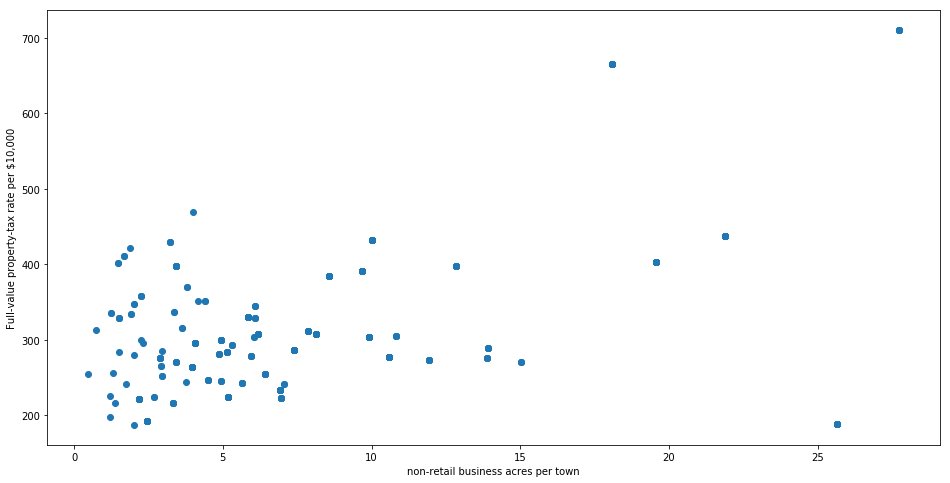

In [32]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(boston_df['INDUS'], boston_df['TAX'])  # scatter plot
ax.set_xlabel('non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

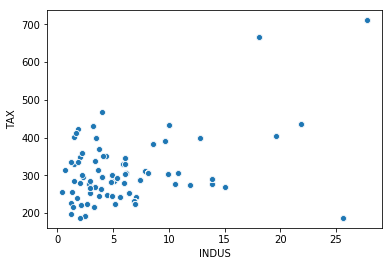

In [33]:
sns.scatterplot(boston_df['INDUS'], boston_df['TAX'])

**Note:** Looking at the plot above, we can see most of data points are lying on the bottom left side but there are points which are far from the population like top right corner. Those are potential outliers.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Discover outliers with statistical rules
 ## Z-Score-

In [34]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))   # get the z-score of every value with respect to their columns
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


**Note:** Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [35]:
threshold = 3
np.where(z > threshold)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

**Note:** The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [36]:
print(z[55][1])

3.375038763517309


**55th record on column ZN is an outlier.**

## IQR  -

In [37]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [38]:
np.where((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))

(array([ 18,  25,  27,  32,  34,  39,  40,  54,  55,  56,  57,  65,  66,
         97,  98, 102, 118, 134, 141, 142, 145, 146, 151, 152, 152, 153,
        154, 154, 155, 155, 156, 160, 160, 162, 162, 163, 163, 165, 166,
        167, 168, 169, 170, 180, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 195, 196, 196, 197, 197, 198, 198, 199, 200, 201, 202,
        203, 203, 204, 204, 208, 209, 210, 211, 212, 216, 218, 219, 220,
        221, 222, 224, 225, 226, 232, 233, 234, 236, 253, 254, 255, 256,
        257, 257, 258, 259, 260, 261, 262, 262, 263, 264, 265, 266, 267,
        267, 268, 269, 273, 274, 274, 275, 276, 276, 277, 277, 278, 280,
        282, 283, 283, 283, 284, 285, 286, 286, 287, 288, 289, 290, 291,
        292, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 331, 332,
        341, 343, 344, 347, 348, 349, 350, 351, 351, 352, 352, 353, 353,
        354, 354, 355, 355, 356, 357, 358, 363, 364, 364, 365, 366, 367,
        367, 367, 369, 370, 371, 372, 373, 373, 374

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Working with Outliers: Correcting, Removing

### 1. Z-Score

In [69]:
boston_df1 = boston_df[(z < 3).all(axis=1)]    # Select only the rows without a single outlier
boston_df1.shape, boston_df.shape

((415, 13), (506, 13))

In [70]:
boston_df2 = boston_df.copy()   #make a copy of the dataframe

#Replace all the outliers with median values. This will create new some outliers but, we will ignore them

for i, j in zip(np.where(z > threshold)[0], np.where(z > threshold)[1]):# iterate using 2 variables.i for rows and j for columns
    boston_df2.iloc[i,j] = boston_df.iloc[:,j].median()  # replace i,jth element with the median of j i.e, corresponding column

In [72]:
z = np.abs(stats.zscore(boston_df2))
np.where(z > threshold)  # New outliers detected after imputing the original outliers


C:\Users\Content_ACER\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\Users\Content_ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(array([ 39,  40,  54,  65,  66, 145, 146, 155, 156, 163, 195, 196, 197,
        198, 224, 232, 233, 253, 254, 255, 267, 286, 290, 291, 292, 298,
        299, 300, 348, 354, 355, 367, 374, 375, 378, 379, 384, 384, 386,
        387, 400, 403, 406, 409, 412, 413, 413, 414, 415, 417, 417, 428,
        430, 432, 433, 434, 435, 438, 440], dtype=int64),
 array([ 1,  1,  1,  1,  1, 11, 11, 11, 11,  5,  1,  1,  1,  1,  5,  5,  5,
         5,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 11,  0,  0,
         0,  0,  0,  5,  0,  0,  0,  0,  0, 11,  0,  0, 11, 11,  0,  0, 11,
        11, 11, 11, 11, 11, 11, 12,  0], dtype=int64))

### 2. IQR Score 

Just like Z-score we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [73]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
boston_df_out.shape

(274, 13)

In [74]:
boston_df4 = boston_df.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(boston_df4 < Q1 - 1.5 * IQR)[0], np.where(boston_df4 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    boston_df4.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(boston_df4 > Q3 + 1.5 * IQR)[0], np.where(boston_df4 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    boston_df4.iloc[i,j] = whisker[j]
    

In [75]:
boston_df4.shape, boston_df.shape

((506, 13), (506, 13))